In [2]:
import pandas as pd

# Load the dataset
file_path = '/content/hungary_chickenpox.csv'
data = pd.read_csv(file_path)

# Display basic information and the first few rows of the dataset
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522 entries, 0 to 521
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      522 non-null    object
 1   BUDAPEST  522 non-null    int64 
 2   BARANYA   522 non-null    int64 
 3   BACS      522 non-null    int64 
 4   BEKES     522 non-null    int64 
 5   BORSOD    522 non-null    int64 
 6   CSONGRAD  522 non-null    int64 
 7   FEJER     522 non-null    int64 
 8   GYOR      522 non-null    int64 
 9   HAJDU     522 non-null    int64 
 10  HEVES     522 non-null    int64 
 11  JASZ      522 non-null    int64 
 12  KOMAROM   522 non-null    int64 
 13  NOGRAD    522 non-null    int64 
 14  PEST      522 non-null    int64 
 15  SOMOGY    522 non-null    int64 
 16  SZABOLCS  522 non-null    int64 
 17  TOLNA     522 non-null    int64 
 18  VAS       522 non-null    int64 
 19  VESZPREM  522 non-null    int64 
 20  ZALA      522 non-null    int64 
dtypes: int64(20), ob

,Date,BUDAPEST,BARANYA,BACS,BEKES,BORSOD,CSONGRAD,FEJER,GYOR,HAJDU,...,JASZ,KOMAROM,NOGRAD,PEST,SOMOGY,SZABOLCS,TOLNA,VAS,VESZPREM,ZALA
0,03/01/2005,168,79,30,173,169,42,136,120,162,...,130,57,2,178,66,64,11,29,87,68
1,10/01/2005,157,60,30,92,200,53,51,70,84,...,80,50,29,141,48,29,58,53,68,26
2,17/01/2005,96,44,31,86,93,30,93,84,191,...,64,46,4,157,33,33,24,18,62,44
3,24/01/2005,163,49,43,126,46,39,52,114,107,...,63,54,14,107,66,50,25,21,43,31
4,31/01/2005,122,78,53,87,103,34,95,131,172,...,61,49,11,124,63,56,7,47,85,60


In [3]:
# Checking for missing values in the dataset
missing_values = data.isnull().sum()

# Displaying summary statistics of the numerical columns
summary_statistics = data.describe()

missing_values, summary_statistics.transpose()

(Date        0
 BUDAPEST    0
 BARANYA     0
 BACS        0
 BEKES       0
 BORSOD      0
 CSONGRAD    0
 FEJER       0
 GYOR        0
 HAJDU       0
 HEVES       0
 JASZ        0
 KOMAROM     0
 NOGRAD      0
 PEST        0
 SOMOGY      0
 SZABOLCS    0
 TOLNA       0
 VAS         0
 VESZPREM    0
 ZALA        0
 dtype: int64,
           count        mean        std  min    25%   50%     75%    max
 BUDAPEST  522.0  101.245211  76.354872  0.0  34.25  93.0  149.00  479.0
 BARANYA   522.0   34.204981  32.567222  0.0   8.00  25.0   51.00  194.0
 BACS      522.0   37.166667  36.843095  0.0   8.00  29.5   53.00  274.0
 BEKES     522.0   28.911877  37.618092  0.0   4.00  14.0   38.75  271.0
 BORSOD    522.0   57.082375  50.725437  0.0  14.25  46.5   83.75  355.0
 CSONGRAD  522.0   31.488506  33.790208  0.0   6.00  20.5   47.00  199.0
 FEJER     522.0   33.272031  31.397989  0.0   7.00  24.0   51.75  164.0
 GYOR      522.0   41.436782  36.014297  0.0   9.00  35.0   63.00  181.0
 HAJDU     52

<ipython-input-4-e92fff4c1d14>:9: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Date'] = pd.to_datetime(data['Date'])


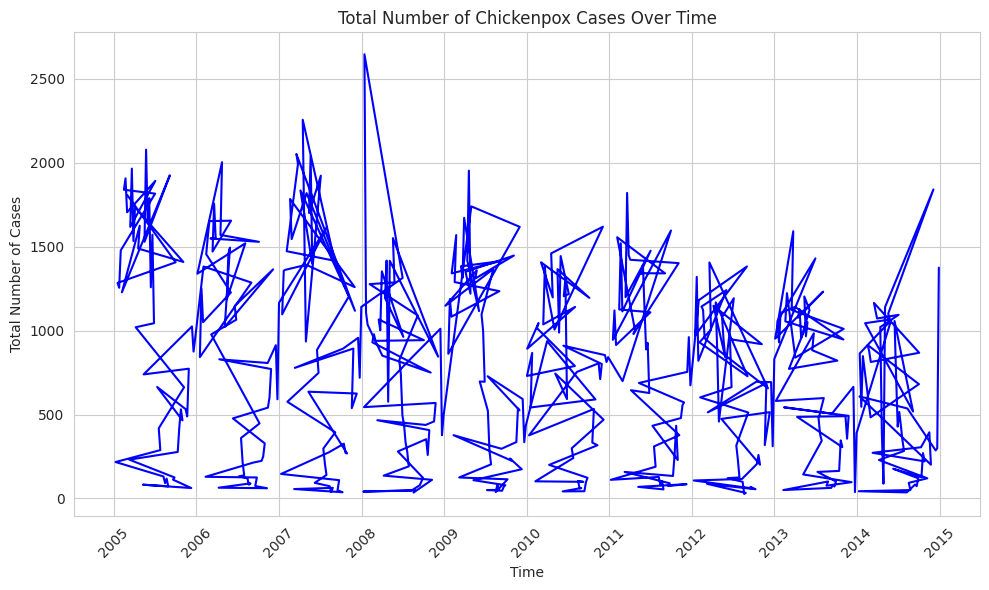

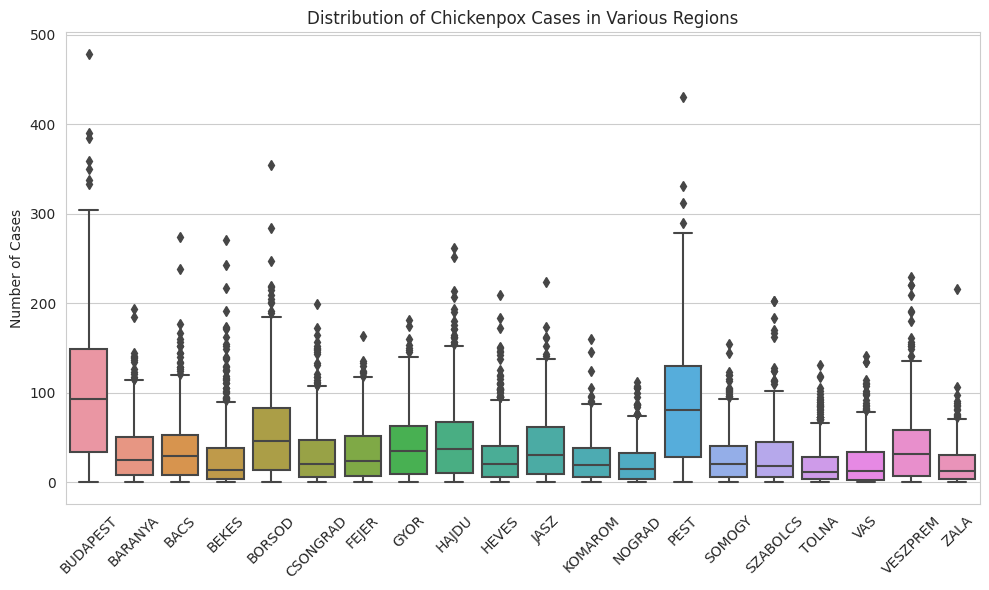

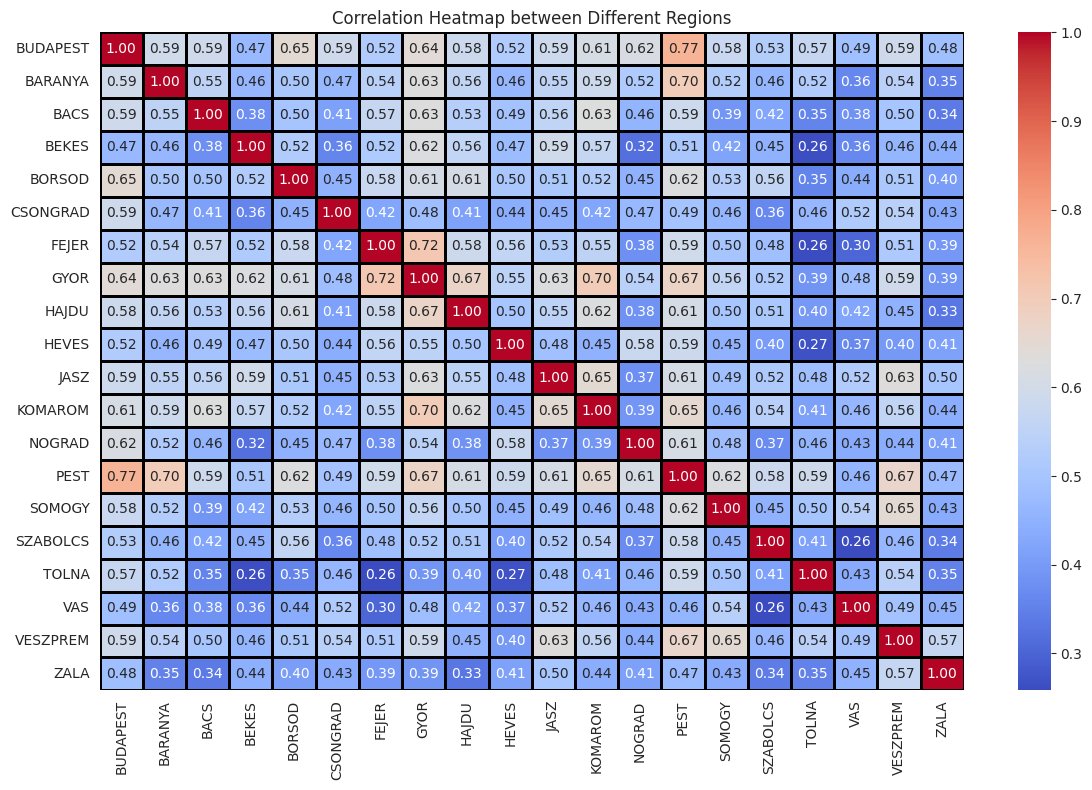

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

# Converting the Date column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Plotting the total number of chickenpox cases over time
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data.drop(columns=['Date']).sum(axis=1), color='b')
plt.title('Total Number of Chickenpox Cases Over Time')
plt.xlabel('Time')
plt.ylabel('Total Number of Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting the distribution of chickenpox cases in various regions
plt.figure(figsize=(10, 6))
sns.boxplot(data=data.drop(columns=['Date']))
plt.xticks(rotation=45)
plt.title('Distribution of Chickenpox Cases in Various Regions')
plt.ylabel('Number of Cases')
plt.tight_layout()
plt.show()

# Creating a heatmap to visualize the correlation between different regions
plt.figure(figsize=(12, 8))
sns.heatmap(data.drop(columns=['Date']).corr(), annot=True, fmt=".2f", cmap='coolwarm', linewidths=2, linecolor='black')
plt.title('Correlation Heatmap between Different Regions')
plt.tight_layout()
plt.show()

In [5]:
# Extracting year, month, and week from the Date column
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Week'] = data['Date'].dt.isocalendar().week

# Dropping the original Date column as we have extracted the necessary information
data_encoded = data.drop(columns=['Date'])

# Displaying the first few rows of the modified dataset
data_encoded.head()

,BUDAPEST,BARANYA,BACS,BEKES,BORSOD,CSONGRAD,FEJER,GYOR,HAJDU,HEVES,...,PEST,SOMOGY,SZABOLCS,TOLNA,VAS,VESZPREM,ZALA,Year,Month,Week
0,168,79,30,173,169,42,136,120,162,36,...,178,66,64,11,29,87,68,2005,3,9
1,157,60,30,92,200,53,51,70,84,28,...,141,48,29,58,53,68,26,2005,10,39
2,96,44,31,86,93,30,93,84,191,51,...,157,33,33,24,18,62,44,2005,1,3
3,163,49,43,126,46,39,52,114,107,42,...,107,66,50,25,21,43,31,2005,1,4
4,122,78,53,87,103,34,95,131,172,40,...,124,63,56,7,47,85,60,2005,1,5


In [6]:
from sklearn.preprocessing import StandardScaler

# Initializing the StandardScaler
scaler = StandardScaler()

# Scaling the features
data_scaled = pd.DataFrame(scaler.fit_transform(data_encoded), columns=data_encoded.columns)

# Displaying the first few rows of the scaled dataset
data_scaled.head()

,BUDAPEST,BARANYA,BACS,BEKES,BORSOD,CSONGRAD,FEJER,GYOR,HAJDU,HEVES,...,PEST,SOMOGY,SZABOLCS,TOLNA,VAS,VESZPREM,ZALA,Year,Month,Week
0,0.875109,1.376783,-0.194705,3.833962,2.208458,0.311379,3.274939,2.183538,2.578130,0.198209,...,1.377587,1.437932,1.074297,-0.402245,0.261484,1.140272,2.189700,-1.567427,-1.018372,-1.162389
1,0.730906,0.792814,-0.194705,1.678677,2.820177,0.637230,0.565163,0.793869,0.827998,-0.053149,...,0.822945,0.763740,-0.026882,1.619197,1.222150,0.672987,0.278746,-1.567427,1.011705,0.831369
2,-0.068761,0.301052,-0.167537,1.519027,0.708758,-0.044094,1.904111,1.182976,3.228819,0.669503,...,1.062790,0.201913,0.098967,0.156877,-0.178821,0.525424,1.097726,-1.567427,-1.598393,-1.561141
3,0.809562,0.454727,0.158481,2.583365,-0.218687,0.222511,0.597042,2.016777,1.344063,0.386726,...,0.313275,1.437932,0.633825,0.199887,-0.058738,0.058140,0.506241,-1.567427,-1.598393,-1.494683
4,0.272081,1.346048,0.430163,1.545635,0.906087,0.074397,1.967871,2.489265,2.802505,0.323887,...,0.568110,1.325567,0.822599,-0.574283,0.981983,1.091084,1.825709,-1.567427,-1.598393,-1.428224


In [7]:
from sklearn.model_selection import train_test_split

# Defining the features (X) and target variable (y)
# Using Budapest as the target variable for prediction as an example, and the rest as features
X = data_scaled.drop(columns=['BUDAPEST'])
y = data_scaled['BUDAPEST']

# Splitting the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Displaying the sizes of the training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((417, 22), (105, 22), (417,), (105,))

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Defining the models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Support Vector Machine': SVR()
}

# DataFrame to store the results
results = pd.DataFrame(columns=['Model', 'MSE', 'Features'])

# Training, predicting, and evaluating each model
for name, model in models.items():
    # Fitting the model
    model.fit(X_train, y_train)

    # Making predictions
    y_pred = model.predict(X_test)

    # Calculating the Mean Squared Error
    mse = mean_squared_error(y_test, y_pred)

    # Storing the results
    results = results.append({'Model': name, 'MSE': mse, 'Features': model}, ignore_index=True)

# Displaying the results sorted by Mean Squared Error
results.sort_values(by='MSE')

<ipython-input-8-c0baa85a7688>:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Model': name, 'MSE': mse, 'Features': model}, ignore_index=True)
<ipython-input-8-c0baa85a7688>:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Model': name, 'MSE': mse, 'Features': model}, ignore_index=True)
<ipython-input-8-c0baa85a7688>:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Model': name, 'MSE': mse, 'Features': model}, ignore_index=True)
<ipython-input-8-c0baa85a7688>:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Model': name, 'MS

,Model,MSE,Features
2,Random Forest,0.457792,"(DecisionTreeRegressor(max_features=1.0, rando..."
3,Gradient Boosting,0.499831,([DecisionTreeRegressor(criterion='friedman_ms...
0,Linear Regression,0.510633,LinearRegression()
1,Decision Tree,0.559934,DecisionTreeRegressor(random_state=42)
4,Support Vector Machine,0.572521,SVR()


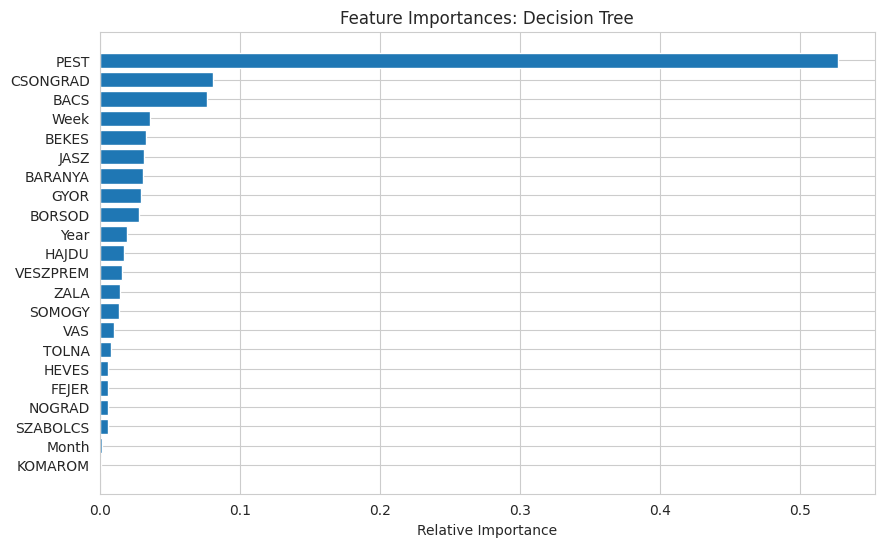

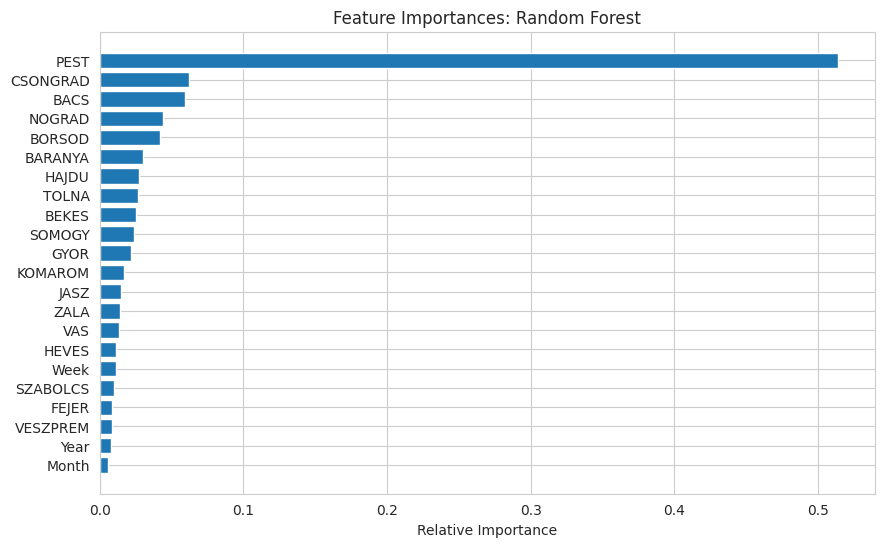

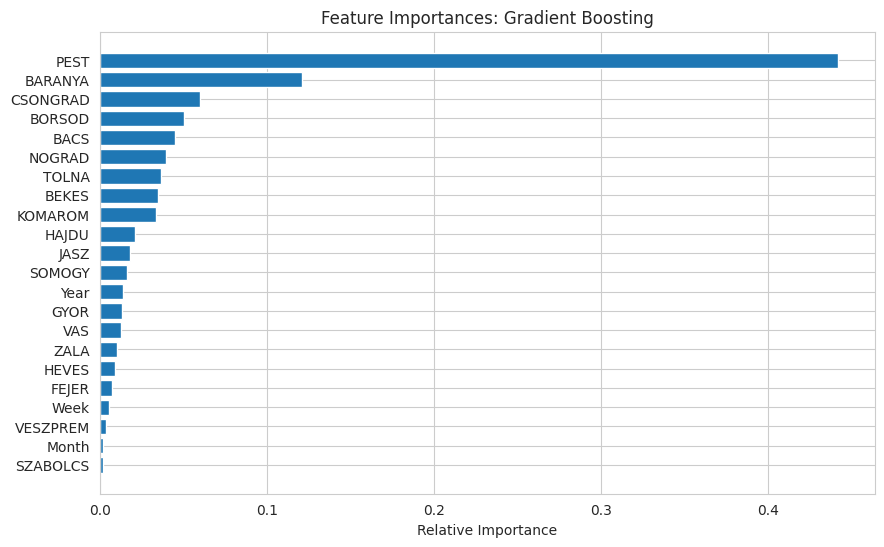

In [9]:
# Function to plot feature importances
def plot_feature_importances(model, model_name, feature_names):
    plt.figure(figsize=(10, 6))
    importances = model.feature_importances_
    indices = np.argsort(importances)
    plt.title(f'Feature Importances: {model_name}')
    plt.barh(range(len(indices)), importances[indices], align='center')
    plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.show()

# Models that have the feature_importances_ attribute
models_with_importances = ['Decision Tree', 'Random Forest', 'Gradient Boosting']

# Plotting the feature importances for the relevant models
for model_name in models_with_importances:
    model = results[results['Model'] == model_name]['Features'].values[0]
    plot_feature_importances(model, model_name, X_train.columns)

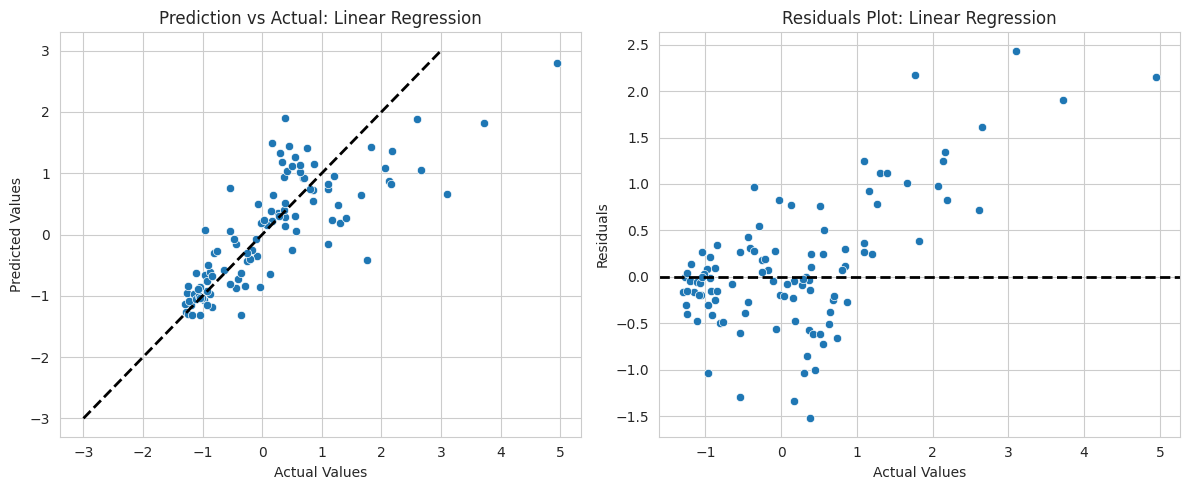

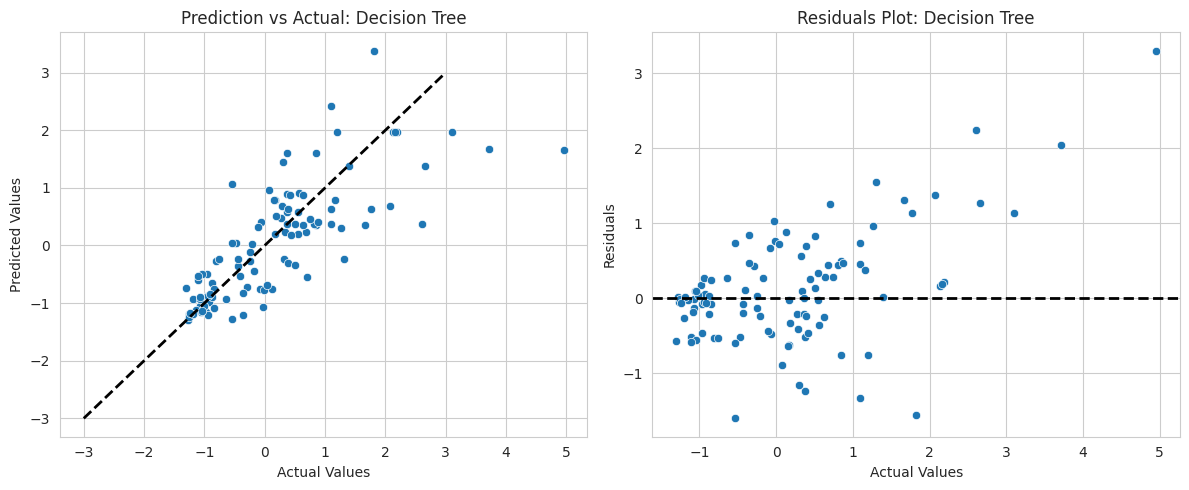

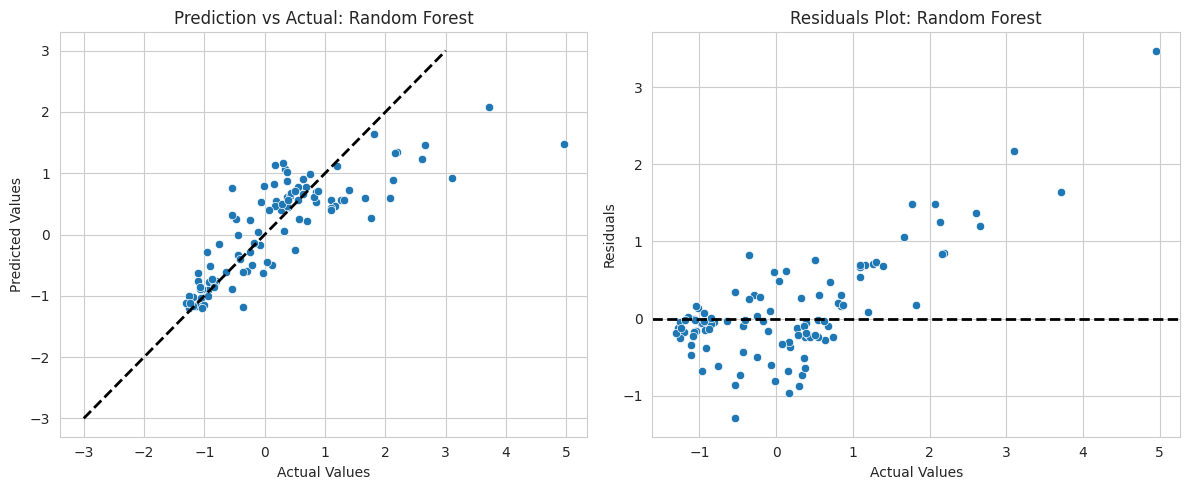

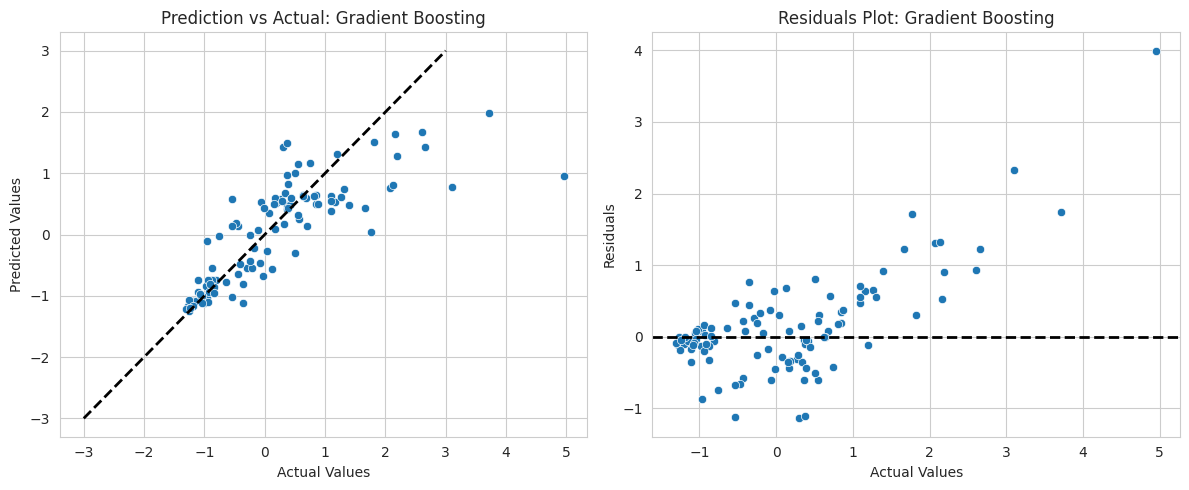

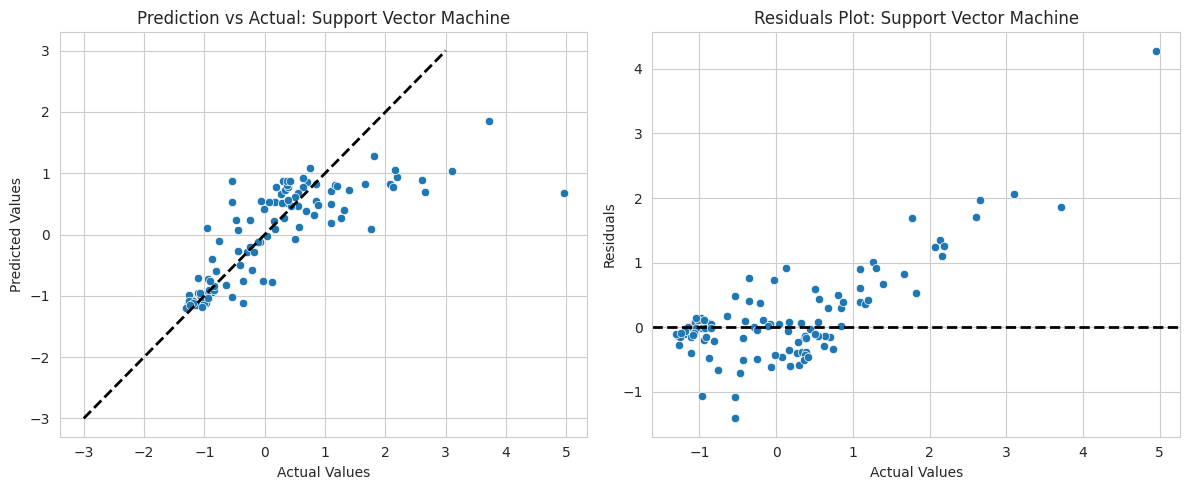

In [11]:
# Function to plot Prediction vs Actual and Residuals Plot for each model
def plot_model_evaluation(model, X_test, y_test, model_name):
    # Making predictions
    y_pred = model.predict(X_test)

    # Creating a DataFrame to store the actual and predicted values
    eval_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    eval_df['Residuals'] = eval_df['Actual'] - eval_df['Predicted']

    # Plotting Prediction vs Actual
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    sns.scatterplot(x='Actual', y='Predicted', data=eval_df)
    plt.plot([-3, 3], [-3, 3], '--k', linewidth=2)  # Line representing y_true = y_pred
    plt.title(f'Prediction vs Actual: {model_name}')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')

    # Plotting Residuals Plot
    plt.subplot(1, 2, 2)
    sns.scatterplot(x='Actual', y='Residuals', data=eval_df)
    plt.axhline(y=0, color='k', linestyle='--', linewidth=2)  # Line representing y_residual = 0
    plt.title(f'Residuals Plot: {model_name}')
    plt.xlabel('Actual Values')
    plt.ylabel('Residuals')

    plt.tight_layout()
    plt.show()

# Generating the visualizations for each model
for index, row in results.iterrows():
    plot_model_evaluation(row['Features'], X_test, y_test, row['Model'])

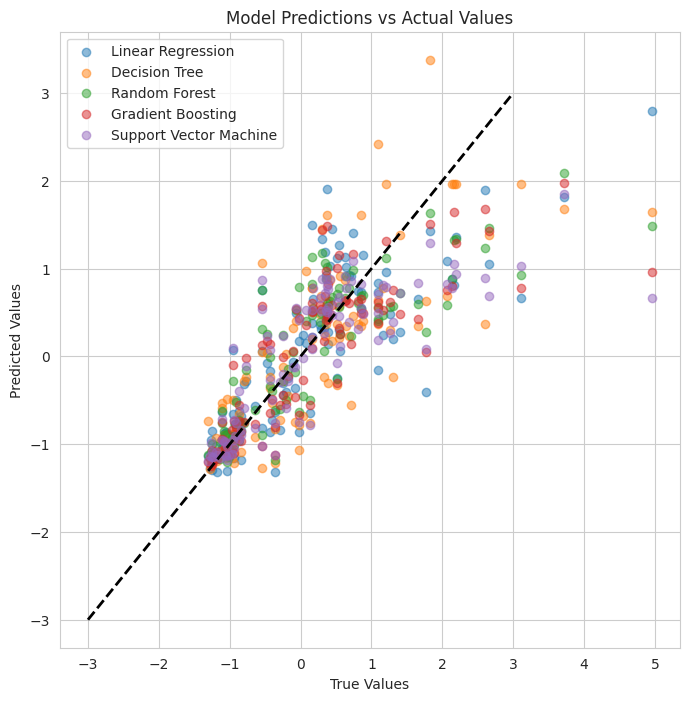

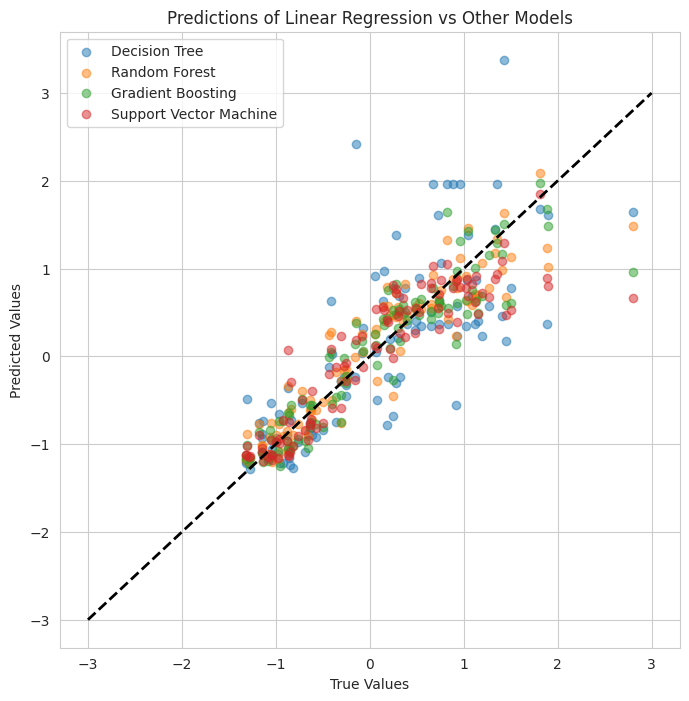

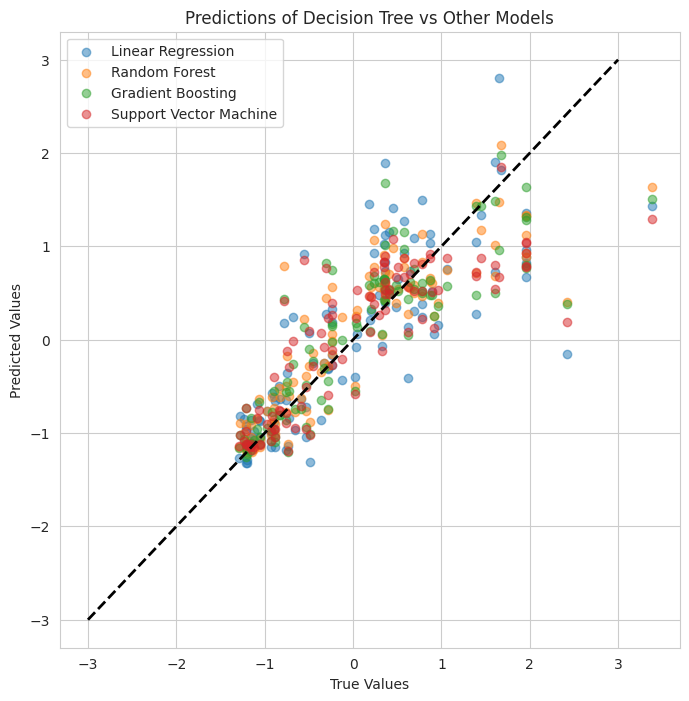

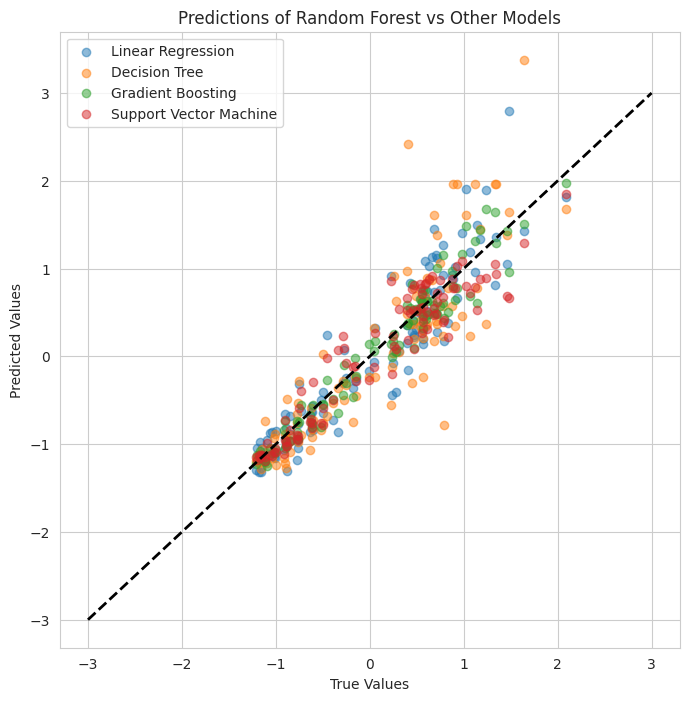

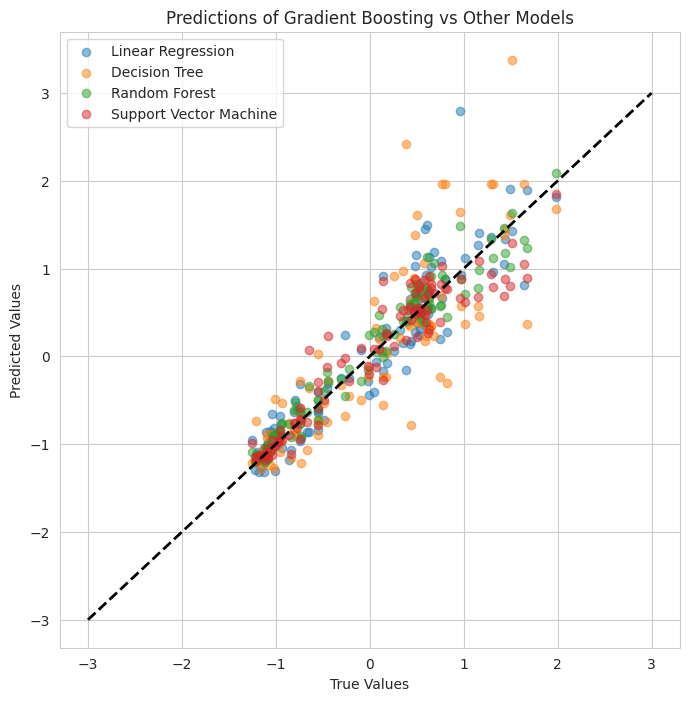

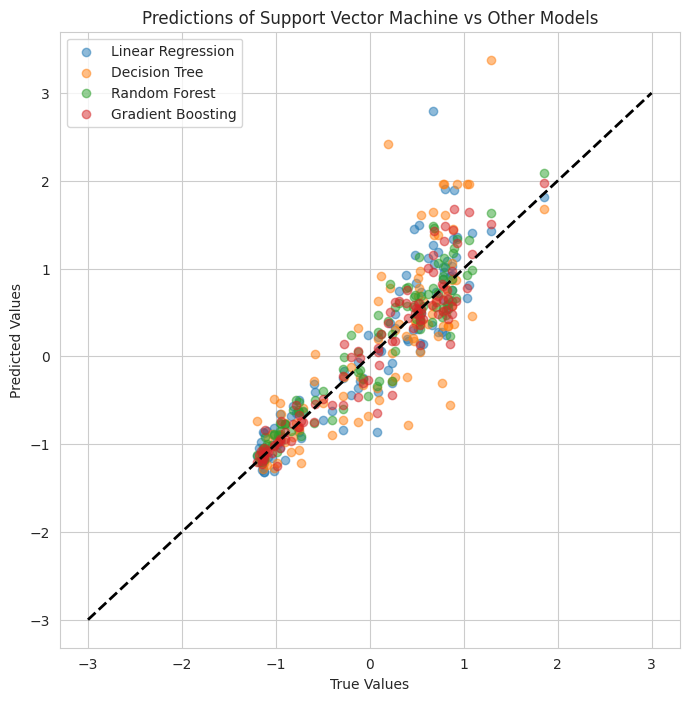

In [10]:
# Function to plot model predictions against actual values or other model predictions
def plot_predictions(y_true, y_preds, model_names, title):
    plt.figure(figsize=(8, 8))
    for y_pred, model_name in zip(y_preds, model_names):
        plt.scatter(y_true, y_pred, alpha=0.5, label=model_name)
    plt.plot([-3, 3], [-3, 3], '--k', linewidth=2)  # Line representing y_true = y_pred
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Getting predictions from all models
y_preds = [model.predict(X_test) for model in results['Features']]

# Plotting predictions against actual values
plot_predictions(y_test, y_preds, results['Model'], 'Model Predictions vs Actual Values')

# Plotting predictions of each model against the other models
for i in range(len(models)):
    plot_predictions(y_preds[i], y_preds[:i]+y_preds[i+1:],
                     results['Model'].tolist()[:i]+results['Model'].tolist()[i+1:],
                     f'Predictions of {results["Model"].iloc[i]} vs Other Models')

In [12]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge

# Defining the base models
base_models = [(name, model) for name, model in zip(results['Model'], results['Features'])]

# Defining the meta-model
meta_model = Ridge()

# Creating the Stacking Regressor
stacking_model = StackingRegressor(estimators=base_models, final_estimator=meta_model, cv=5)

# Training the Stacking Regressor
stacking_model.fit(X_train, y_train)

# Making predictions
y_pred_stacking = stacking_model.predict(X_test)

# Calculating the Mean Squared Error of the Stacking Regressor
mse_stacking = mean_squared_error(y_test, y_pred_stacking)

# Adding the Stacking Regressor to the results
results_stacking = results.append({'Model': 'Stacking Ensemble', 'MSE': mse_stacking, 'Features': stacking_model}, ignore_index=True)

# Displaying the results including the Stacking Regressor
results_stacking.sort_values(by='MSE')

<ipython-input-12-1aaf3ce615c3>:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_stacking = results.append({'Model': 'Stacking Ensemble', 'MSE': mse_stacking, 'Features': stacking_model}, ignore_index=True)


,Model,MSE,Features
5,Stacking Ensemble,0.453598,"StackingRegressor(cv=5,\n est..."
2,Random Forest,0.457792,"(DecisionTreeRegressor(max_features=1.0, rando..."
3,Gradient Boosting,0.499831,([DecisionTreeRegressor(criterion='friedman_ms...
0,Linear Regression,0.510633,LinearRegression()
1,Decision Tree,0.559934,DecisionTreeRegressor(random_state=42)
4,Support Vector Machine,0.572521,SVR()


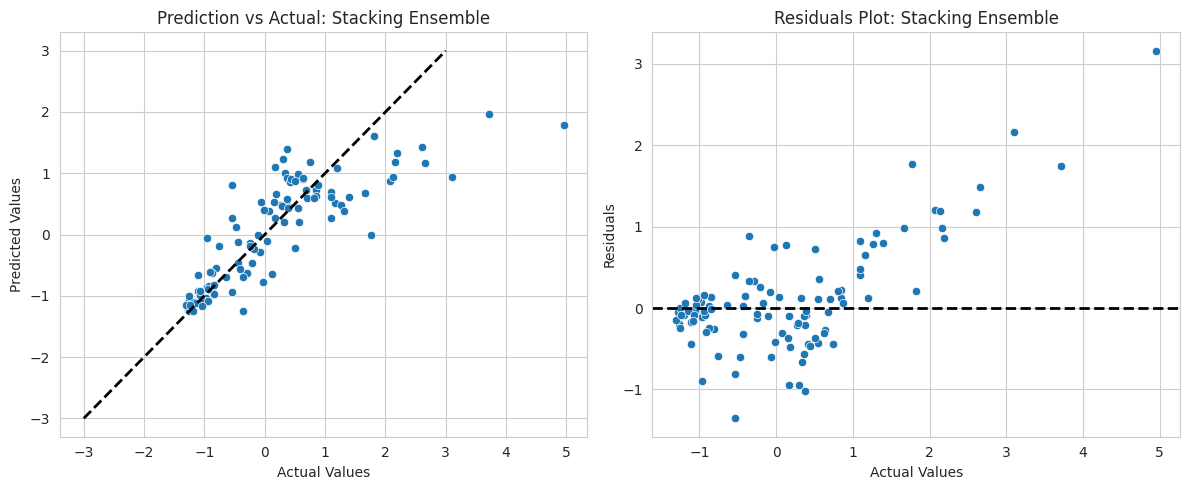

In [13]:
# Generating the evaluation visualizations for the Stacking ensemble model
plot_model_evaluation(stacking_model, X_test, y_test, 'Stacking Ensemble')